In [140]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 64 bytes


In [141]:
!pip install -q kaggle

In [142]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [143]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

pulmonary-chest-xray-abnormalities.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [146]:
!pip install timm

In [147]:
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [148]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [149]:
cxr_paths = glob(os.path.join('/content','Montgomery', 'MontgomerySet', '*', '*.png'))
print("There are {} images in the dataset".format(len(cxr_paths)))


There are 138 images in the dataset


In [150]:
cxr_images = [(c_path, 
               [os.path.join('/'.join(c_path.split('/')[:-2]),'ManualMask','leftMask', os.path.basename(c_path)),
               os.path.join('/'.join(c_path.split('/')[:-2]),'ManualMask','rightMask', os.path.basename(c_path))]
              ) for c_path in cxr_paths]

In [151]:
print(cxr_images[0])

('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0044_0.png', ['/content/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0044_0.png', '/content/Montgomery/MontgomerySet/ManualMask/rightMask/MCUCXR_0044_0.png'])


In [152]:
import cv2

In [175]:
from PIL import Image
def imread(in_path):
    OUT_DIM = (512, 512)
    
    # use the skimge function to read the file specified in the path
    img_data = cv2.imread(in_path)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
    
    # make sure the image data is between the range 0-255 and convert the variable into uint8
    n_img = (255*np.array(cv2.resize(img_data,OUT_DIM, interpolation=cv2.INTER_LINEAR))).clip(0,255).astype(np.float32)
        
    return n_img

In [176]:
from  tqdm.notebook import tqdm
# init empty array for images and masks or in this case segmentations
img_vol, seg_vol = [], []

for img_path, s_paths in tqdm(cxr_images):
    # first read the image paths
    img_vol += [imread(img_path)]    
    #print(img_vol[0].shape)
    # read both images, stack them up, then store them    
    seg_vol += [np.max(np.stack([imread(s_path) for s_path in s_paths],0),0)]


img_vol = np.stack(img_vol,0)
seg_vol = np.stack(seg_vol,0)

In [177]:
print('Images', img_vol.shape, 'Segmentations', seg_vol.shape)

Images (138, 512, 512, 3) Segmentations (138, 512, 512, 3)


In [232]:
lbl_names = os.listdir("/content/Montgomery/MontgomerySet/ManualMask/leftMask/")

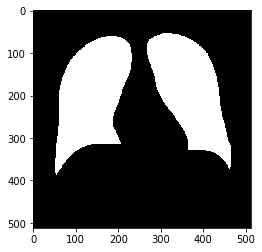

In [211]:
from matplotlib import pyplot as plt
plt.imshow(seg_vol[0], interpolation='nearest')
plt.show()

In [225]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray((seg_vol[0]*255).astype(np.uint8), mode="RGB")


In [227]:
im.save("lung.png")

In [231]:
!rm -r labels
!rm -r label

In [235]:
lbl_names.sort()
del(lbl_names[0])
print(lbl_names)

['MCUCXR_0001_0.png', 'MCUCXR_0002_0.png', 'MCUCXR_0003_0.png', 'MCUCXR_0004_0.png', 'MCUCXR_0005_0.png', 'MCUCXR_0006_0.png', 'MCUCXR_0008_0.png', 'MCUCXR_0011_0.png', 'MCUCXR_0013_0.png', 'MCUCXR_0015_0.png', 'MCUCXR_0016_0.png', 'MCUCXR_0017_0.png', 'MCUCXR_0019_0.png', 'MCUCXR_0020_0.png', 'MCUCXR_0021_0.png', 'MCUCXR_0022_0.png', 'MCUCXR_0023_0.png', 'MCUCXR_0024_0.png', 'MCUCXR_0026_0.png', 'MCUCXR_0027_0.png', 'MCUCXR_0028_0.png', 'MCUCXR_0029_0.png', 'MCUCXR_0030_0.png', 'MCUCXR_0031_0.png', 'MCUCXR_0035_0.png', 'MCUCXR_0038_0.png', 'MCUCXR_0040_0.png', 'MCUCXR_0041_0.png', 'MCUCXR_0042_0.png', 'MCUCXR_0043_0.png', 'MCUCXR_0044_0.png', 'MCUCXR_0045_0.png', 'MCUCXR_0046_0.png', 'MCUCXR_0047_0.png', 'MCUCXR_0048_0.png', 'MCUCXR_0049_0.png', 'MCUCXR_0051_0.png', 'MCUCXR_0052_0.png', 'MCUCXR_0053_0.png', 'MCUCXR_0054_0.png', 'MCUCXR_0055_0.png', 'MCUCXR_0056_0.png', 'MCUCXR_0057_0.png', 'MCUCXR_0058_0.png', 'MCUCXR_0059_0.png', 'MCUCXR_0060_0.png', 'MCUCXR_0061_0.png', 'MCUCXR_0062

In [237]:
# This was to create the labels 

for i, image in tqdm(enumerate(seg_vol)):
    im = Image.fromarray((image*255).astype(np.uint8), mode="RGB")
    im.save("/content/labels/"+lbl_names[i])


In [160]:
help(open_mask)

Help on function open_mask in module fastai.vision.image:

open_mask(fn:Union[pathlib.Path, str], div=False, convert_mode='L', after_open:Callable=None) -> fastai.vision.image.ImageSegment
    Return `ImageSegment` object create from mask in file `fn`. If `div`, divides pixel values by 255.



In [238]:
path_img = "/content/Montgomery/MontgomerySet/CXR_png/"
path_lbl = "/content/labels/"

In [239]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0044_0.png'),
 PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0051_0.png'),
 PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0266_1.png')]

In [240]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/content/labels/MCUCXR_0044_0.png'),
 PosixPath('/content/labels/MCUCXR_0051_0.png'),
 PosixPath('/content/labels/MCUCXR_0266_1.png')]

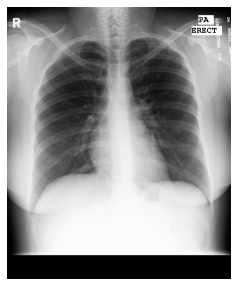

In [241]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

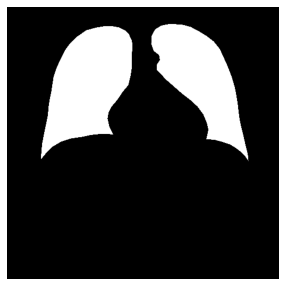

In [245]:
img_l = lbl_names[0]
mask = open_image(img_l)
mask.show(figsize=(5,5))

In [253]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

In [286]:
doc(SegmentationItemList.from_folder)

In [278]:
get_y_fn = lambda x: path_lbl+f"{x.stem}{x.suffix}"

In [ ]:
src = SegmentationItemList.from_folder(path_img).split_subsets(0.8, 0.2).label_from_func(get_y_fn, classes = np.array(['0', '1']))

In [283]:
import warnings
warnings.filterwarnings('ignore')

In [293]:
bs =64
data = (src.transform(get_transforms(), size=512, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

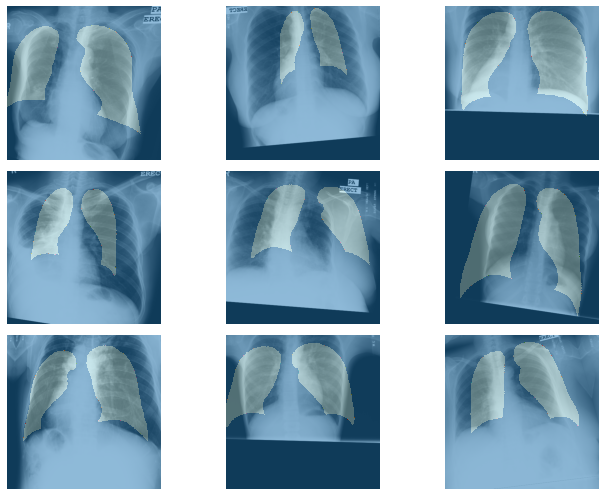

In [295]:
data.show_batch(3, figsize=(10,7))